In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
np.set_printoptions(precision=4, linewidth=100)

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [4]:
ipl_auction_df = pd.read_csv( 'IPL IMB381IPL2013.csv' )

In [5]:
ipl_auction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
Sl.NO.           130 non-null int64
PLAYER NAME      130 non-null object
AGE              130 non-null int64
COUNTRY          130 non-null object
TEAM             130 non-null object
PLAYING ROLE     130 non-null object
T-RUNS           130 non-null int64
T-WKTS           130 non-null int64
ODI-RUNS-S       130 non-null int64
ODI-SR-B         130 non-null float64
ODI-WKTS         130 non-null int64
ODI-SR-BL        130 non-null float64
CAPTAINCY EXP    130 non-null int64
RUNS-S           130 non-null int64
HS               130 non-null int64
AVE              130 non-null float64
SR-B             130 non-null float64
SIXERS           130 non-null int64
RUNS-C           130 non-null int64
WKTS             130 non-null int64
AVE-BL           130 non-null float64
ECON             130 non-null float64
SR-BL            130 non-null float64
AUCTION YEAR     130 non-null int64
BASE PRICE   

In [6]:
ipl_auction_df.iloc[0:5, 0:10]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93


In [7]:
ipl_auction_df.columns

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

In [8]:
X_features = ipl_auction_df.columns

X_features = ['AGE', 'COUNTRY', 'PLAYING ROLE',
'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B',
'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S',
'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS',
'AVE-BL', 'ECON', 'SR-BL']

In [9]:
ipl_auction_df['PLAYING ROLE'].unique()

array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

In [10]:
pd.get_dummies(ipl_auction_df['PLAYING ROLE'])[0:5]

,Allrounder,Batsman,Bowler,W. Keeper
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0


In [11]:
categorical_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']

In [12]:
ipl_auction_encoded_df = pd.get_dummies( ipl_auction_df[X_features],
columns = categorical_features,
drop_first = True )

In [13]:
ipl_auction_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [14]:
X_features = ipl_auction_encoded_df.columns

In [15]:
ipl_auction_encoded_df

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,...,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,0,0,0,0.00,0,0.0,0,0,0.00,0.00,...,0,0,1,0,0,0,0,0,0,0
1,214,18,657,71.41,185,37.6,0,0,0.00,0.00,...,0,0,0,0,0,0,0,1,0,0
2,571,58,1269,80.62,288,32.9,167,39,18.56,121.01,...,0,0,0,0,0,0,0,1,0,0
3,284,31,241,84.56,51,36.8,58,11,5.80,76.32,...,0,0,0,0,0,0,0,1,0,0
4,63,0,79,45.93,0,0.0,1317,71,32.93,120.71,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,0,0,0.00,0,0.0,49,16,9.80,125.64,...,0,0,0,0,0,0,1,0,0,0
126,6398,7,6814,75.78,3,86.6,3,3,3.00,42.85,...,0,1,0,0,0,0,1,0,0,1
127,1775,9,8051,87.58,109,44.3,1237,66,26.32,131.88,...,0,0,0,0,0,0,1,0,0,1
128,1114,288,790,73.55,278,35.4,99,23,9.90,91.67,...,0,0,0,0,0,0,0,1,0,0


# Clustering

In [16]:
from sklearn.cluster import KMeans
clusters_new = KMeans( 3 , init='k-means++',random_state=42 )
clusters_new.fit( ipl_auction_encoded_df )
ipl_auction_encoded_df["clusterid_new"] = clusters_new.labels_

In [17]:
ipl_auction_encoded_df

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,...,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1,clusterid_new
0,0,0,0,0.00,0,0.0,0,0,0.00,0.00,...,0,1,0,0,0,0,0,0,0,0
1,214,18,657,71.41,185,37.6,0,0,0.00,0.00,...,0,0,0,0,0,0,1,0,0,0
2,571,58,1269,80.62,288,32.9,167,39,18.56,121.01,...,0,0,0,0,0,0,1,0,0,0
3,284,31,241,84.56,51,36.8,58,11,5.80,76.32,...,0,0,0,0,0,0,1,0,0,0
4,63,0,79,45.93,0,0.0,1317,71,32.93,120.71,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,0,0,0.00,0,0.0,49,16,9.80,125.64,...,0,0,0,0,0,1,0,0,0,0
126,6398,7,6814,75.78,3,86.6,3,3,3.00,42.85,...,1,0,0,0,0,1,0,0,1,1
127,1775,9,8051,87.58,109,44.3,1237,66,26.32,131.88,...,0,0,0,0,0,1,0,0,1,1
128,1114,288,790,73.55,278,35.4,99,23,9.90,91.67,...,0,0,0,0,0,0,1,0,0,0


In [18]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(ipl_auction_encoded_df, clusters_new.labels_, metric="euclidean")

0.6260187770237254

In [19]:
cluster_range = range( 2, 19 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( ipl_auction_encoded_df )
    cluster_errors.append( clusters.inertia_ )
    print(silhouette_score(ipl_auction_encoded_df, clusters_new.labels_, metric="euclidean"))

0.6260187770237254
0.6260187770237254
0.6260187770237254
0.6260187770237254
0.6260187770237254
0.6260187770237254
0.6260187770237254
0.6260187770237254
0.6260187770237254
0.6260187770237254
0.6260187770237254
0.6260187770237254
0.6260187770237254
0.6260187770237254
0.6260187770237254
0.6260187770237254
0.6260187770237254


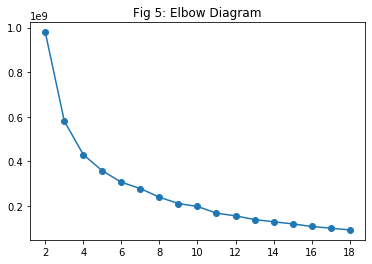

In [20]:
plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
plt.title( "Fig 5: Elbow Diagram");

In [21]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)

In [22]:
from sklearn.cluster import AgglomerativeClustering

h_clusters = AgglomerativeClustering()
h_clusters.fit(ipl_auction_encoded_df)
ipl_auction_encoded_df["h_clusterid"] = h_clusters.labels_

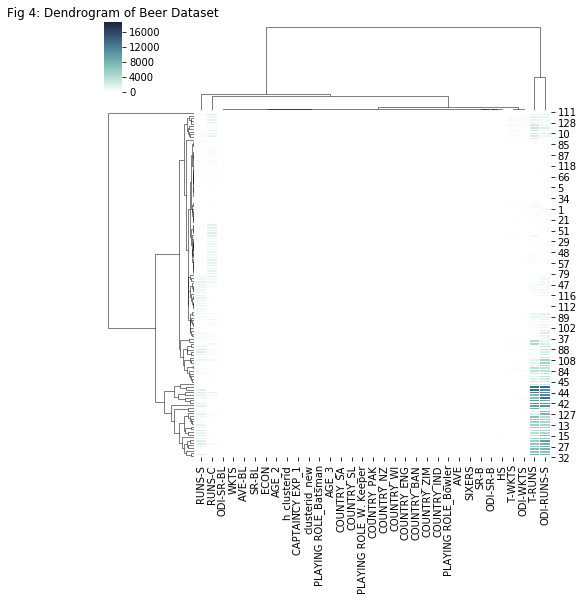

In [23]:
sn.clustermap(ipl_auction_encoded_df, cmap=cmap, linewidths=.2,figsize = (8,8) );
plt.title( "Fig 4: Dendrogram of Beer Dataset");

In [24]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(ipl_auction_encoded_df, h_clusters.labels_, metric="euclidean")

0.6821741437026094

In [25]:
ipl_auction_encoded_df.shape

(130, 33)

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca_object = PCA(n_components=33)

In [28]:
principalComponents = pca_object.fit_transform(ipl_auction_encoded_df)

In [29]:
principalDf = pd.DataFrame(data = principalComponents)
principalDf

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-3332.955570,132.426702,-198.000149,-351.332805,-92.248720,63.118780,97.419308,-42.114704,14.464650,13.040859,...,-0.110857,-0.016188,-0.028161,0.026021,0.056367,-0.089365,0.083194,0.029159,0.049650,-0.070569
1,-2695.793292,-146.822145,-394.672892,-512.712855,60.600238,-71.053198,133.468066,-6.940936,-46.932667,-0.715977,...,0.162317,0.063052,0.175602,0.013556,0.206588,0.256854,0.042950,-0.299696,-0.391600,0.465367
2,-2026.951728,-292.492538,594.668935,-117.331891,45.776542,-156.090166,42.281966,-13.647509,3.248157,3.129243,...,0.054164,-0.092842,0.167187,-0.038673,-0.110338,0.164451,0.003403,0.058657,0.038860,-0.077938
3,-2986.675075,189.952476,586.495364,-73.529457,-127.668455,10.311185,17.302905,1.091909,-28.234790,-0.371647,...,-0.058823,-0.067912,0.101606,0.363782,0.108879,-0.037136,0.062287,-0.041180,0.018510,-0.017501
4,-3138.207030,-92.318688,-842.486883,802.085916,39.729493,-1.274421,20.128939,-35.705654,3.684353,-20.462639,...,0.081538,0.075024,-0.074160,-0.014633,-0.005696,-0.078948,0.001096,0.028562,0.023803,0.040612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,-3319.722808,117.660452,-504.883421,-390.044502,-54.855642,15.568928,-9.347126,-52.855539,39.062869,-27.985078,...,0.029876,0.056365,-0.084329,-0.014512,-0.068649,0.120385,0.031858,0.024073,-0.053129,0.017883
126,5999.524263,356.527893,-51.192170,-893.411035,-126.459268,60.632670,38.114303,38.403641,-31.295253,-18.971516,...,-0.564867,-0.057113,-0.276571,0.040250,-0.352353,0.082780,0.218130,-0.047111,-0.005284,-0.044699
127,3862.334737,-4045.145932,343.071960,-87.421305,36.899090,34.064630,-5.468406,-12.430085,-2.775214,-7.798382,...,0.066899,-0.078905,-0.062959,-0.115368,0.171647,-0.015660,-0.308281,-0.035149,-0.048539,-0.027987
128,-2042.549462,454.863447,1274.586868,128.509529,128.240477,-18.020881,11.837470,-21.459787,-14.625710,1.065944,...,-0.067051,-0.005012,0.011855,0.000754,-0.118442,0.128126,0.042662,0.002743,0.017051,-0.016628


In [30]:
import numpy as np
#The amount of variance that each PC explains
var= pca_object.explained_variance_ratio_
var

array([9.2324e-01, 5.2804e-02, 1.2055e-02, 1.0683e-02, 9.9577e-04, 8.7079e-05, 4.7202e-05,
       3.5492e-05, 1.8800e-05, 1.2375e-05, 1.1444e-05, 4.2739e-06, 1.2618e-06, 8.5728e-07,
       3.8607e-07, 1.5752e-07, 1.1313e-08, 7.2038e-09, 5.4747e-09, 4.5028e-09, 3.4710e-09,
       3.0591e-09, 2.8502e-09, 2.0390e-09, 1.8081e-09, 1.4351e-09, 1.2741e-09, 1.1106e-09,
       9.7170e-10, 6.9798e-10, 5.2072e-10, 2.2007e-10, 1.8481e-10])

In [31]:
var1=np.cumsum(np.round(pca_object.explained_variance_ratio_, decimals=4)*100)
var1

array([92.32, 97.6 , 98.81, 99.88, 99.98, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99])

In [32]:
from sklearn.decomposition import PCA
pca_object = PCA(n_components=4)
principalComponents = pca_object.fit_transform(ipl_auction_encoded_df)

In [33]:
principalDf = pd.DataFrame(data = principalComponents)
principalDf

,0,1,2,3
0,-3332.955570,132.426702,-198.000149,-351.332805
1,-2695.793292,-146.822145,-394.672892,-512.712855
2,-2026.951728,-292.492538,594.668935,-117.331891
3,-2986.675075,189.952476,586.495364,-73.529457
4,-3138.207030,-92.318688,-842.486883,802.085916
...,...,...,...,...
125,-3319.722808,117.660452,-504.883421,-390.044502
126,5999.524263,356.527893,-51.192170,-893.411035
127,3862.334737,-4045.145932,343.071960,-87.421305
128,-2042.549462,454.863447,1274.586868,128.509529


In [34]:
ipl_auction_encoded_df = principalDf

In [35]:
pca_object.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 4,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [80]:
import statsmodels.api as sm

In [81]:
X = sm.add_constant( ipl_auction_encoded_df )

In [82]:
Y = ipl_auction_df['SOLD PRICE']

In [83]:
train_X, test_X, train_y, test_y = train_test_split( X ,
Y,
train_size = 0.8,
random_state = 42 )

In [84]:
ipl_model_1 = sm.OLS(train_y, train_X).fit()
ipl_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.274     
Dependent Variable: SOLD PRICE       AIC:                2957.7518 
Date:               2020-03-22 21:41 BIC:                2970.9738 
No. Observations:   104              Log-Likelihood:     -1473.9   
Df Model:           4                F-statistic:        10.73     
Df Residuals:       99               Prob (F-statistic): 2.87e-07  
R-squared:          0.303            Scale:              1.2545e+11
-------------------------------------------------------------------
         Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
-------------------------------------------------------------------
const 527510.2578 34863.7384 15.1306 0.0000 458333.0371 596687.4786
0         25.0787     7.3655  3.4049 0.0010     10.4640     39.6933
1       -108.3285    29.7626 -3.6397 0.0004   -167.3840    -49.2730
2         77.8003    64.2413  1.2111 0.2288    -49.6683    205.2689
3        273.4772    70.3112  3.8895 0.0002    133.9646    412.9899
-------------------------------------------------------------------
Omnibus:              29.579        Durbin-Watson:           2.210 
Prob(Omnibus):        0.000         Jarque-Bera (JB):        45.602
Skew:                 1.308         Prob(JB):                0.000 
Kurtosis:             4.918         Condition No.:           4757  
===================================================================
* The condition number is large (5e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [85]:
ipl_model_1 = sm.OLS(train_y, train_X).fit()
ipl_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.274     
Dependent Variable: SOLD PRICE       AIC:                2957.7518 
Date:               2020-03-22 21:41 BIC:                2970.9738 
No. Observations:   104              Log-Likelihood:     -1473.9   
Df Model:           4                F-statistic:        10.73     
Df Residuals:       99               Prob (F-statistic): 2.87e-07  
R-squared:          0.303            Scale:              1.2545e+11
-------------------------------------------------------------------
         Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
-------------------------------------------------------------------
const 527510.2578 34863.7384 15.1306 0.0000 458333.0371 596687.4786
0         25.0787     7.3655  3.4049 0.0010     10.4640     39.6933
1       -108.3285    29.7626 -3.6397 0.0004   -167.3840    -49.2730
2         77.8003    64.2413  1.2111 0.2288    -49.6683    205.2689
3        273.4772    70.3112  3.8895 0.0002    133.9646    412.9899
-------------------------------------------------------------------
Omnibus:              29.579        Durbin-Watson:           2.210 
Prob(Omnibus):        0.000         Jarque-Bera (JB):        45.602
Skew:                 1.308         Prob(JB):                0.000 
Kurtosis:             4.918         Condition No.:           4757  
===================================================================
* The condition number is large (5e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [86]:
def draw_pp_plot( model, title ):
    probplot = sm.ProbPlot( model.resid );
    plt.figure( figsize = (8, 6) );
    probplot.ppplot( line='45' );
    plt.title( title );
    plt.show();

<Figure size 576x432 with 0 Axes>

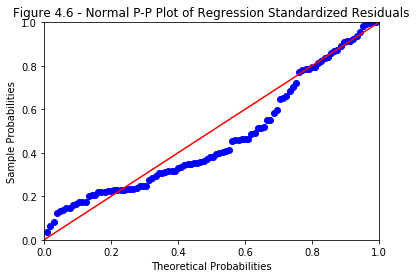

In [89]:
draw_pp_plot( ipl_model_1,
"Figure 4.6 - Normal P-P Plot of Regression Standardized Residuals"
);

In [90]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

In [91]:
def plot_resid_fitted( fitted, resid, title):
    plt.scatter( get_standardized_values( fitted ),
    get_standardized_values( resid ) )
    plt.title( title )
    plt.xlabel( "Standardized predicted values")
    plt.ylabel( "Standardized residual values")
    plt.show()

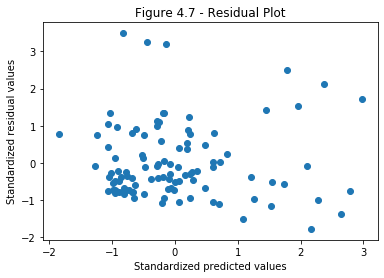

In [94]:
plot_resid_fitted( ipl_model_1.fittedvalues,
ipl_model_1.resid,
"Figure 4.7 - Residual Plot")

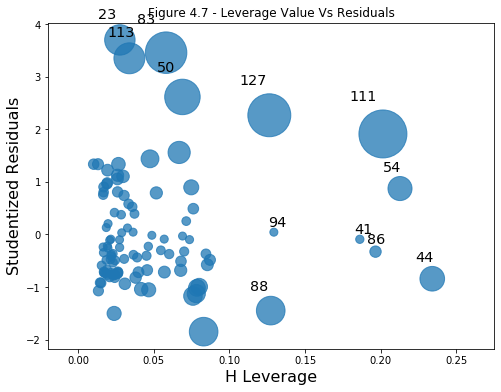

In [96]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots( figsize=(8,6) )
influence_plot( ipl_model_1, ax = ax )
plt.title( "Figure 4.7 - Leverage Value Vs Residuals")
plt.show()

In [97]:
ipl_auction_df[ipl_auction_df.index.isin( [23, 58, 83] )]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
23,24,"Flintoff, A",2,ENG,CSK,Allrounder,3845,226,3394,88.82,...,116.98,2,105,2,52.50,9.55,33.00,2009,950000,1550000
58,59,"Mascarenhas, AD",2,ENG,RR+,Allrounder,0,0,245,95.33,...,101.37,1,331,19,17.42,7.01,14.95,2011,100000,100000
83,84,"Pietersen, KP",2,ENG,RCB+,Batsman,6654,5,4184,86.76,...,141.20,30,215,7,30.71,7.41,24.86,2009,1350000,1550000


In [98]:
train_X_new = train_X.drop( [23, 58, 83], axis = 0)
train_y_new = train_y.drop( [23, 58, 83], axis = 0)

In [99]:
train_y = np.sqrt( train_y )

In [100]:
ipl_model_4 = sm.OLS(train_y, train_X).fit()
ipl_model_4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.300    
Dependent Variable: SOLD PRICE       AIC:                1436.3308
Date:               2020-03-22 21:42 BIC:                1449.5527
No. Observations:   104              Log-Likelihood:     -713.17  
Df Model:           4                F-statistic:        12.03    
Df Residuals:       99               Prob (F-statistic): 5.26e-08 
R-squared:          0.327            Scale:              55610.   
--------------------------------------------------------------------
         Coef.     Std.Err.      t      P>|t|     [0.025     0.975] 
--------------------------------------------------------------------
const   671.3362    23.2122   28.9217   0.0000   625.2781   717.3942
0         0.0170     0.0049    3.4620   0.0008     0.0072     0.0267
1        -0.0646     0.0198   -3.2591   0.0015    -0.1039    -0.0253
2         0.0847     0.0428    1.9809   0.0504    -0.0001     0.1696
3         0.2095     0.0468    4.4762   0.0000     0.1167     0.3024
------------------------------------------------------------------
Omnibus:               7.988        Durbin-Watson:           2.223
Prob(Omnibus):         0.018        Jarque-Bera (JB):        7.983
Skew:                  0.675        Prob(JB):                0.018
Kurtosis:              3.135        Condition No.:           4757 
==================================================================
* The condition number is large (5e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

<Figure size 576x432 with 0 Axes>

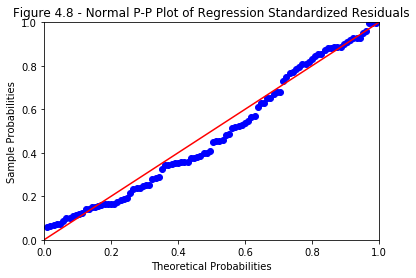

In [101]:
draw_pp_plot( ipl_model_4,
"Figure 4.8 - Normal P-P Plot of Regression Standardized Residuals"
);

In [102]:
pred_y = np.power( ipl_model_4.predict( test_X[train_X.columns] ), 2)

In [103]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(pred_y, test_y))

298074.1547322753

In [104]:
np.round( metrics.r2_score(pred_y, test_y), 2 )

-0.72